# Prediction of benign or malignant cancer tumors 

The goal of this project is to classify breast cancer tumors into malignant or benign groups using the provided database and machine learning skills. In other words, we try to predict the probability of a tumor being benign based on the historical data (feature and target variables) that are already synthesized. 
 
The data for this study is a modified version of a dataset that is collected from UCI Machine Learning Repository [1]. In the current version of the data, all values are synthesized, and they are not real-valued features. The only purpose of this dataset is to test the machine learning skills of the applicants. 

Attribute Information:
1) ID number 
2) Diagnosis (M = malignant, B = benign) 
3-32) 

Ten real-valued features are computed for each cell nucleus: 

a) radius (mean of distances from center to points on the perimeter) 
b) texture (standard deviation of gray-scale values) 
c) perimeter 
d) area 
e) smoothness (local variation in radius lengths) 
f) compactness (perimeter^2 / area - 1.0) 
g) concavity (severity of concave portions of the contour) 
h) concave points (number of concave portions of the contour) 
i) symmetry 
j) fractal dimension ("coastline approximation" - 1) 

### Loading UCI cancer dataset

In [103]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set(color_codes=True)
sns.set(style='white')

In [54]:
names = ['id','diagnosis', 'radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 
         'concavity_mean','concave_points_mean', 
         'symmetry_mean', 'fractal_dimension_mean',
         'radius_se', 'texture_se', 'perimeter_se', 
         'area_se', 'smoothness_se', 'compactness_se', 
         'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 
         'perimeter_worst', 'area_worst', 
         'smoothness_worst', 'compactness_worst', 
         'concavity_worst', 'concave_points_worst', 
         'symmetry_worst', 'fractal_dimension_worst'] 


In [55]:
df=pd.read_csv("data.csv")

In [56]:
df.drop(['Unnamed: 32'],axis=1,inplace=True)

In [57]:
print("Here's the dimensions of our data frame:\n",
     df.shape)

Here's the dimensions of our data frame:
 (569, 32)


In [58]:
df.columns=names

### Checking the basic data structure of the cancer dataset

In [59]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [60]:
df.describe()  # Statistical summary of numerical columns
# Features are in different scales, so there is a need to standardize the variables, before modeling

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [61]:
df.info()  # Diagnosis is the only categorical feature and there are no missing values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave_points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [62]:
for col in df.columns:
   if  df[col].isnull().sum() ==0:
    pass
   else:
        print(col)
        print(df[col].isna().sum())
print('Sanity Check! No missing Values found in the dataset!')

Sanity Check! No missing Values found in the dataset!


In [63]:
# Setting 'id' as our index
df.set_index(keys=['id'],inplace=True)
df.shape

(569, 31)

#### Checking for class imbalance in the dataset

In [64]:
# Checking for class imbalance in the dataset
df['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

Benign results account for 62.74% of the diagnosis class. Malignant results account for 37.26% of the diagnosis class. , so this data set does not suffer from class imbalance.

In [65]:
# Converted diagnosis feature to binary to help later on with models and plots
cat_replace={'diagnosis':{'M':1, 'B':0}}
df.replace(cat_replace,inplace=True)

In [66]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

### Using data visualization tools, please explain how we can understand the data structure

#### Displays the benign/malignant data counts

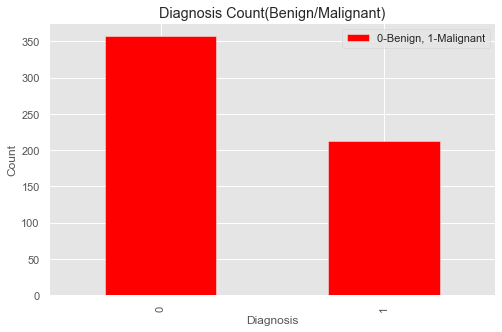

In [105]:
plt.figure(figsize=(8, 5))
#plt.style.use('ggplot')
df['diagnosis'].value_counts().plot(kind='bar', color='red', label='0-Benign, 1-Malignant')
plt.title("Diagnosis Count(Benign/Malignant)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.legend(loc='best')
plt.show()

#### Pairwise correlation of mean variables

In [89]:
# We will use the means of the features, to do the visualization and analysis
feature_means=df.columns[1:11]
feature_means

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [88]:
df_corr=df[feature_means].corr()
df_corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave_points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


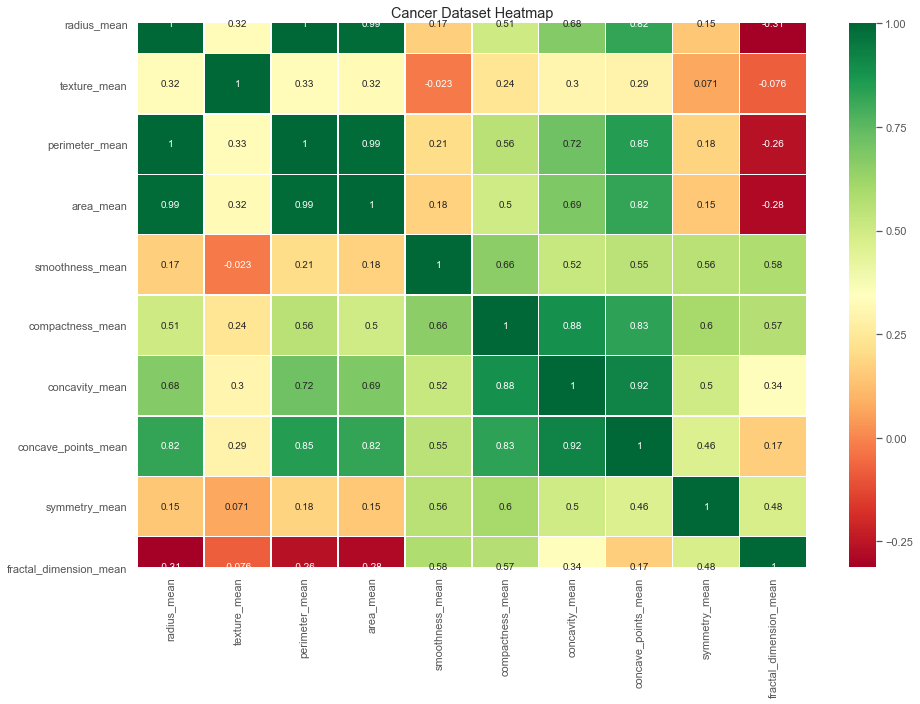

In [86]:
# Pairwise correlation between the numerical feature means
plt.figure(figsize=(15, 10))
sns.heatmap(df_corr,  annot=True,cmap='RdYlGn', linewidths=0.30)
plt.title("Cancer Dataset Heatmap")
plt.show()
# Some of the features have multicollinearity , like radius mean ,perimeter mean and area mean

Some of the features have multicollinearity , like radius mean ,perimeter mean and area mean. THese features have strong positive correaltion. At the same time, negative correlation is noted between radius mean and fractal dimension mean

#### Diagnosis distribution across the feature means

Boxplots can be used to compare each features data distribution, for malignant and Benign tumors. It is also used to check the presence of outliers. For most of the features, as the value goes high, there are more chances of malignancy

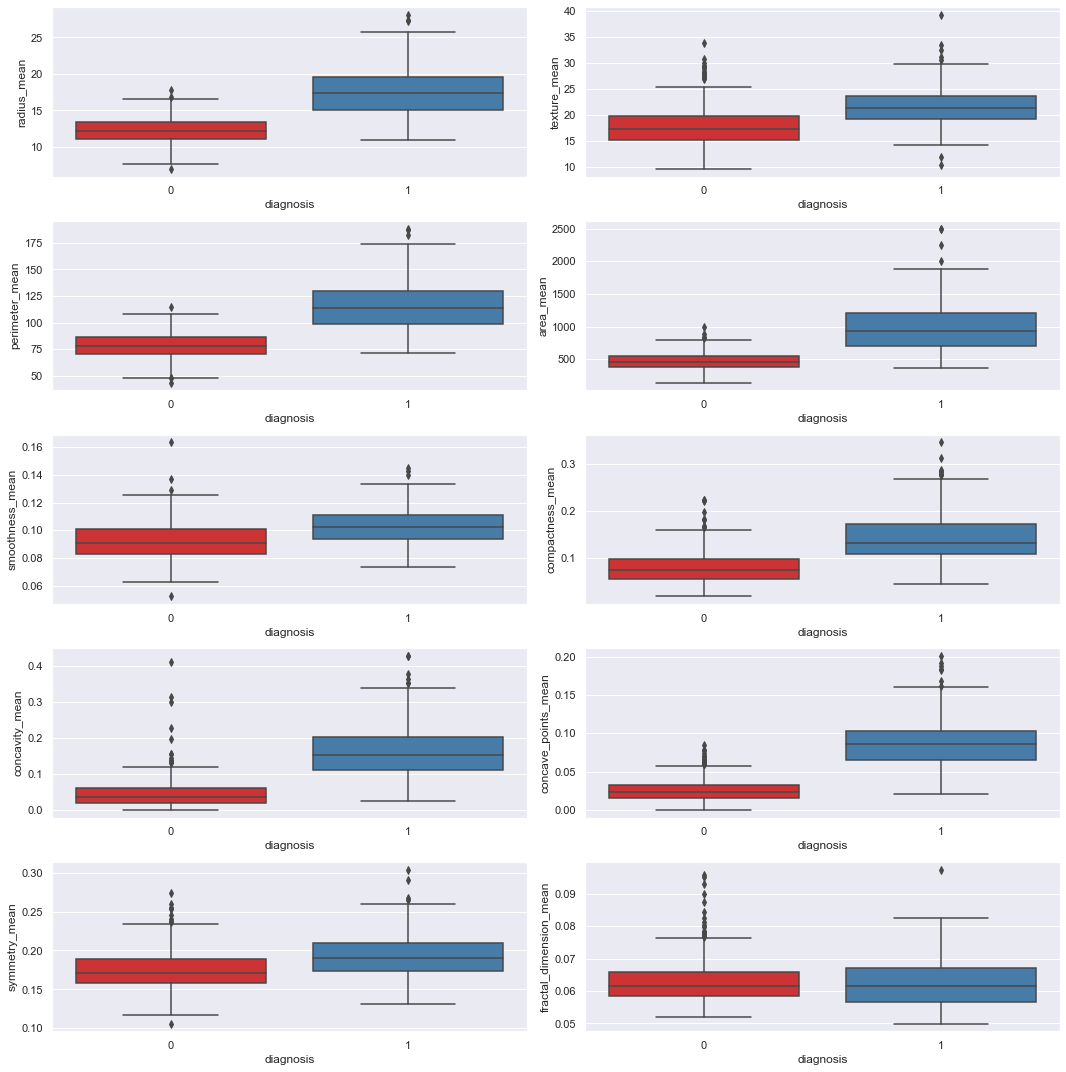

In [18]:
plt.figure(figsize=(15,15))
for i, feature in enumerate(feature_means):
    rows = int(len(feature_means)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.boxplot(x='diagnosis', y=feature, data=df, palette="Set1")

plt.tight_layout()
plt.show()


#### scatter charts between the pair of variables to understand the relationships.

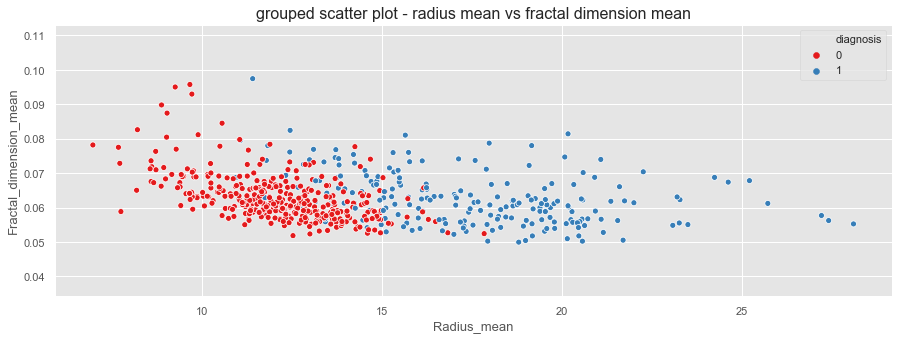

In [119]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='radius_mean',y='fractal_dimension_mean',data=df,hue='diagnosis',palette="Set1")
plt.xlabel('Radius_mean', fontsize=13)
plt.ylabel('Fractal_dimension_mean', fontsize=13)
plt.title('grouped scatter plot - radius mean vs fractal dimension mean',fontsize=16)
plt.legend()
plt.show()

1. More malignancy is noted in bigger values of radius mean( ie, >16)
2. The features are correalted negatively(weakly)
3. Fractal dimension mean doesnot have much impact on malignancy prediction.

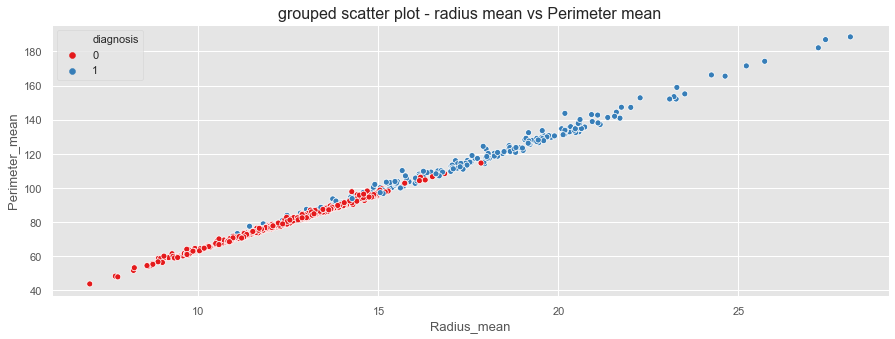

In [117]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='radius_mean',y='perimeter_mean',data=df,hue='diagnosis',palette="Set1")
plt.xlabel('Radius_mean', fontsize=13)
plt.ylabel('Perimeter_mean', fontsize=13)
plt.title('grouped scatter plot - radius mean vs Perimeter mean',fontsize=16)
plt.legend()
plt.show()

1. Higher malignancy is noted in bigger values of radius mean and perimeter mean ( ie, >13)
2. The features are correalted positively

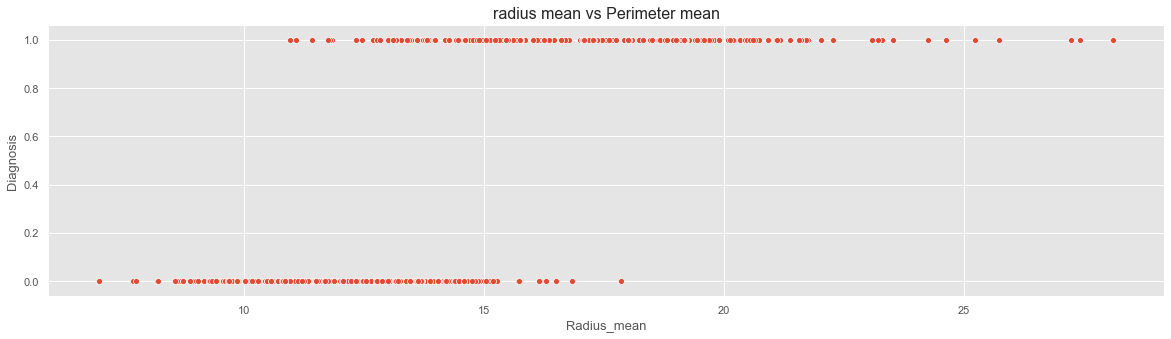

In [126]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='radius_mean',y='diagnosis',data=df)
plt.xlabel('Radius_mean', fontsize=13)
plt.ylabel('Diagnosis', fontsize=13)
plt.title('radius mean vs Perimeter mean',fontsize=16)
plt.show()

#### Kde Plot For Each Mean Feature

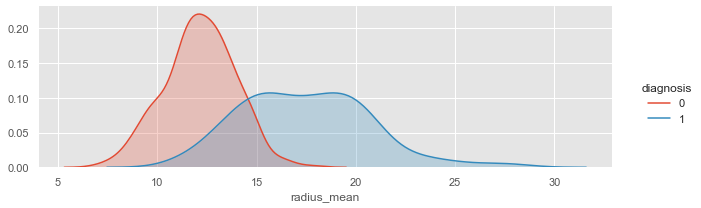

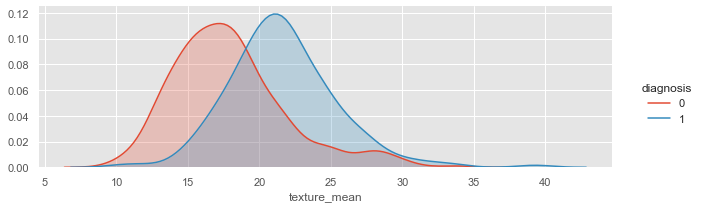

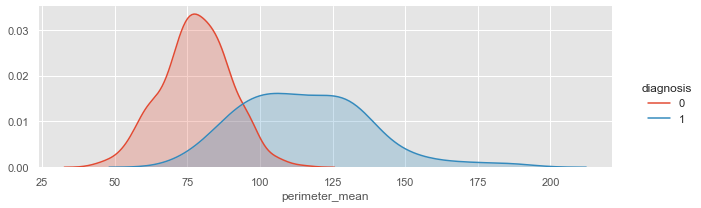

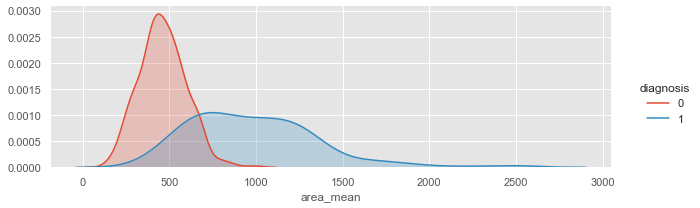

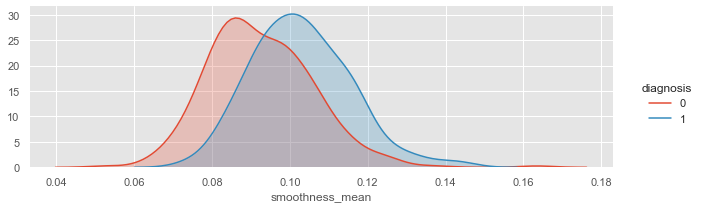

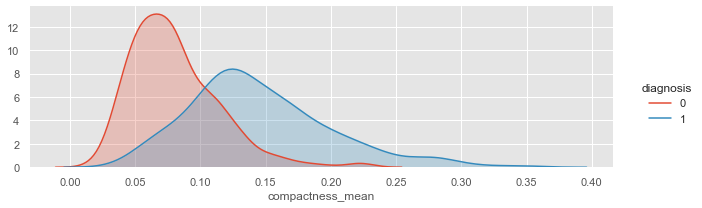

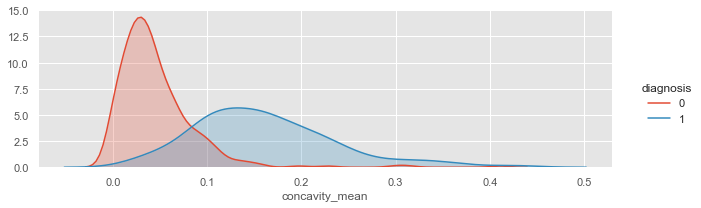

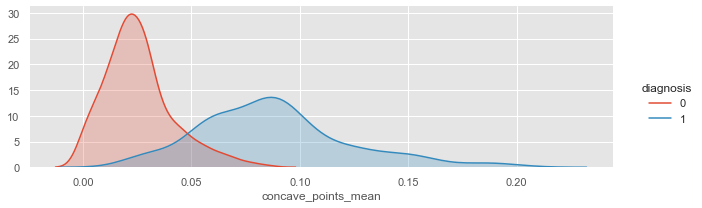

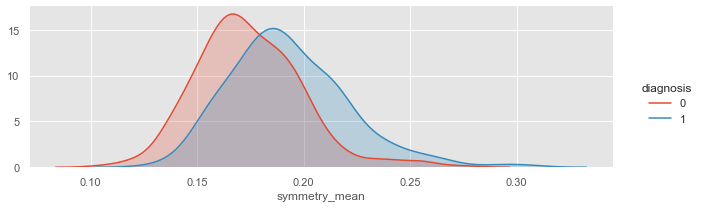

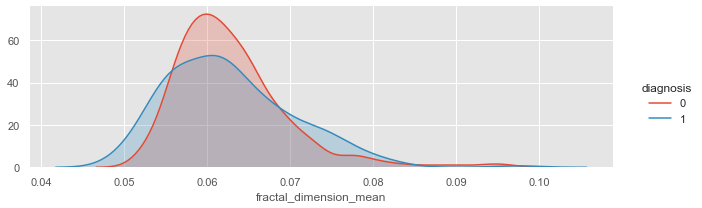

In [149]:
for i in range(len(feature_means)):
    sns.FacetGrid(df,hue="diagnosis",aspect=3,margin_titles=True).map(sns.kdeplot,feature_means[i],shade= True).add_legend()

### Please explain if dimensionality reduction is required/possible or not. How did you check?

Dimenisonality reduction is needed in case of large datasets, with huge no of features. In the cancer dataset, we have only 32 features which does not meets the criterion for reducing dimension. But we have found some multicollinearity in the independant variables, while doing the pairwise correaltion. So it is good to experiment with dimensionality reduction, during the classification and evaluate the metrics , to check the impact

Dimensionality reduction can be achieved using either feature selection or dimensioanlity reduction techniques like PCA, factor analysis etc. We will use Prinicpal Component analysis in the dataset, to create PCs with maximum variance

PCA is a unsupervised ML algorithm that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. Summary variables are formed by the linear transformation of the exising correlated features

Need to Standardize the data since PCA's output is influenced based on the scale of the features of the data.

### Please explain eigen-vectors and eigen-values and their importance. 

Each PC is identified by an eigen value and eigen vector , which comes in pairs. Simply put, an eigenvector is a direction, such as "vertical" or "45 degrees", while an eigenvalue is a number telling you how much variance there is in the data in that direction. The eigenvector with the highest eigenvalue is, therefore, the first principal component.

We can reframe a dataset in terms of these eigenvectors and eigenvalues without changing the underlying information. Note that reframing a dataset regarding a set of eigenvalues and eigenvectors does not entail changing the data itself, you’re just looking at it from a different angle, which should represent the data better.

### Which classification methods are you using? How do you decide among different methods? 

Model the data using
1. Logistic Regression
2. KNeighbors classifier
3. Support Vector Machine ( Linear, non linear)
4. Naive Bayes
4. Decision Tree Classifier
5. Random Forest Classifier

Model Evaluation using accuracy score, confusion matrix, classification report

In [19]:
# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.eval_measures import rmse
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import GridSearchCV

In [20]:
feature_cols=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 
         'concavity_mean','concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean','radius_se', 'texture_se', 'perimeter_se', 
         'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 
         'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 
         'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']
x=df[feature_cols]
y=df['diagnosis']

In [21]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [22]:
#Feature Scaling
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [23]:
# Cancer dataset is projected into three-dimensional principal components.
pca=PCA(n_components=3)
x_train_pc=pca.fit_transform(x_train_scaled)
x_test_pc=pca.fit_transform(x_test_scaled)

In [24]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.45750995 0.17443105 0.09373747]


About 73% variance is explained using the 3 prinicpal components

In [25]:
#Using Logistic Regression Algorithm to the Training Set
classifier_logreg = LogisticRegression(random_state = 0)
classifier_logreg.fit(x_train_scaled, y_train)
y_pred_logreg=classifier_logreg.predict(x_test_scaled)
print('Accuracy of Logistic regression without PCA: {}'.format(accuracy_score(y_test,y_pred_logreg)))

Accuracy of Logistic regression without PCA: 0.9766081871345029


In [26]:
#Using Logistic Regression Algorithm to the Training Set with PCA
classifier_logreg_pc = LogisticRegression(random_state = 0)
classifier_logreg_pc.fit(x_train_pc, y_train)
y_pred_logreg_pc=classifier_logreg_pc.predict(x_test_pc)
print('Accuracy of Logistic regression with PCA: {}'.format(accuracy_score(y_test,y_pred_logreg_pc)))

Accuracy of Logistic regression with PCA: 0.9122807017543859


In [27]:
#Dimensionality reduction causes a reduction in accuracy, during classification. So there is no need to do PCA.

In [28]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(x_train_scaled, y_train)
y_pred_knn=classifier_knn.predict(x_test_scaled)
print('Accuracy of KNN regression: {}'.format(accuracy_score(y_test,y_pred_knn)))

Accuracy of KNN regression: 0.9590643274853801


In [29]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'linear', random_state = 0)
classifier_svc.fit(x_train_scaled, y_train)
y_pred_svc=classifier_svc.predict(x_test_scaled)
print('Accuracy of SVM-linear: {}'.format(accuracy_score(y_test,y_pred_svc)))

Accuracy of SVM-linear: 0.9590643274853801


In [145]:
#Using SVC-Kernel method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifier_svc_rbf = SVC(kernel = 'rbf', random_state = 0,C=1)
classifier_svc_rbf.fit(x_train_scaled, y_train)
y_pred_svc_rbf=classifier_svc_rbf.predict(x_test_scaled)
print('Accuracy of SVM-RBF: {}'.format(accuracy_score(y_test,y_pred_svc_rbf)))

Accuracy of SVM-RBF: 0.9766081871345029


In [137]:
#Using Naive Bayes to use Support Vector Machine Algorithm
# GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(x_train_scaled, y_train)
y_pred_nb=classifier_nb.predict(x_test_scaled)
print('Accuracy of Naive Bayes-Gaussian: {}'.format(accuracy_score(y_test,y_pred_nb)))

Accuracy of Naive Bayes-Gaussian: 0.9122807017543859


In [30]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
classifier_dec = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dec.fit(x_train, y_train)
y_pred_dec=classifier_dec.predict(x_test)
print('Accuracy of Decision Tree Classifier: {}'.format(accuracy_score(y_test,y_pred_dec)))

Accuracy of Decision Tree Classifier: 0.935672514619883


In [140]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
classifier_rnd = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rnd.fit(x_train_scaled, y_train)
y_pred_rnd=classifier_rnd.predict(x_test_scaled)
print('Accuracy of Random Forest Classifier: {}'.format(accuracy_score(y_test,y_pred_rnd)))

Accuracy of Random Forest Classifier: 0.9649122807017544


Logistic Regression, Non linear SVM and Random Forest are giving good accuracy. Now will check feature importance using random forest

In [135]:
feature_imp=sorted(list(zip(feature_cols,classifier_rnd.feature_importances_)),key=lambda x:x[1],reverse=True)
feature_imp[:10] # Top 10 important features

[('concave_points_worst', 0.18811876683312012),
 ('area_se', 0.15640405744380018),
 ('concave_points_mean', 0.15155524432655781),
 ('concavity_mean', 0.10822955808538792),
 ('radius_worst', 0.09504467339720409),
 ('perimeter_worst', 0.044051465356754034),
 ('radius_se', 0.040768581897568185),
 ('texture_worst', 0.024218550539922494),
 ('texture_mean', 0.021023887252379463),
 ('radius_mean', 0.020237886159494522)]

### Please provide a confusion matrix and explain how it can help us to check the reliability of the result. 

In [170]:
from yellowbrick.classifier import ConfusionMatrix

In [171]:
print("Confusion Matrix of Logistic regression classifier :\n\n",confusion_matrix(y_test,y_pred_logreg,labels=[0,1]))

Confusion Matrix of Logistic regression classifier :

 [[107   1]
 [  3  60]]


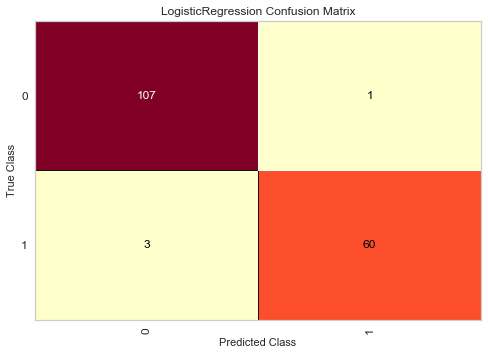

In [172]:
cm=ConfusionMatrix(classifier_logreg)
cm.fit(x_train_scaled,y_train)
cm.score(x_test_scaled,y_test)
cm.show()
# TP=60, FP=1
# TN=107,FN=3

In [173]:
print(classification_report(y_test,y_pred_logreg)) # Logistic regression

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [34]:
print("Confusion Matrix of Random Forest classifier :\n\n",confusion_matrix(y_test,y_pred_rnd))

Confusion Matrix of Random Forest classifier :

 [[107   1]
 [  5  58]]


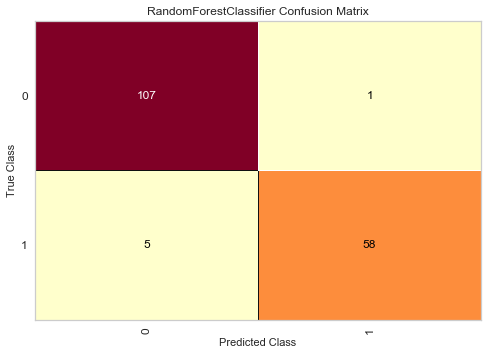

In [176]:
cm1=ConfusionMatrix(classifier_rnd)
cm1.fit(x_train_scaled,y_train)
cm1.score(x_test_scaled,y_test)
cm1.show()
# TP=58, FP=1
# TN=107,FN=5

In [177]:
print(classification_report(y_test,y_pred_rnd)) # Random Forest

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       108
           1       0.98      0.92      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



In [146]:
print("Confusion Matrix of SVM :\n\n",confusion_matrix(y_test,y_pred_svc_rbf))

Confusion Matrix of SVM :

 [[107   1]
 [  3  60]]


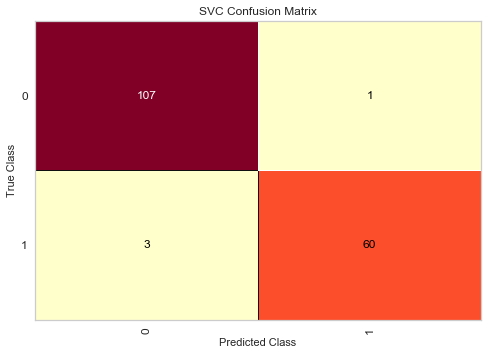

In [178]:
cm2=ConfusionMatrix(classifier_svc_rbf)
cm2.fit(x_train_scaled,y_train)
cm2.score(x_test_scaled,y_test)
cm2.show()
# TP=60, FP=1
# TN=107,FN=3

1. Logistic regrssion and Non linear SVC gives the best Recall or True positive rate (TP/TP+FN) (60/63) for the malignant cases.(95%)

2. FP or Type I error is similar in logistic regression,SVC & Random Forest(Only 1). False positives are a serious concern while predicting malignancy. 

3. FN or Type II error, is more in Random Forest Classifier (5 cases). Some malignant cases are wrongly classified as benign.

3. Either logistic regression or SVC RBF can be chosen as the classifier  in this case, since these gives the best sensitivity (predition of malignancy) and a great F1 score.

### Please provide the learning curve and explain how it can help us in determining whether the model is being over-fit or under-fit. 

Learning curves of model performance on the train and validation datasets can be used to diagnose an underfit, overfit, or well-fit model. It is used to visualize the impact of data size on train and test scores

In [37]:
from sklearn.model_selection import learning_curve

In [38]:
train_sizes, train_scores, test_scores = learning_curve(classifier_logreg, x, y, n_jobs=-1, cv=5, 
                                                        train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
    

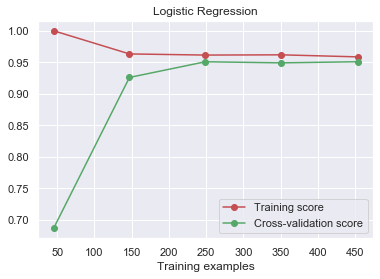

In [39]:
plt.figure()
plt.title("Logistic Regression")
plt.xlabel("Training examples")
# plot the average training and test score lines at each training set size
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend()
plt.show()

1. Training score decreases as the train size increases, so there is no overfitting. 
2. Good train score, which decreases a little and plateaus, ie, low bias
3. There is not much gap between train scores and test scores,so that means the model is well fit and  gives good result with a new dataset., ie, not much variance
4. There is a good bias variance tradeoff here, so a well fit model

### When do you consider adding the “regularization parameter” to the model? and how it will help to improve the model performance? ● 

Regualrization parameter is usually added to a complex model, which has overfitting, so as to increase the bias in the model.
This is to help the model to give good results with a new dataset.

There is L1 and L2 regularization, which can be added to a model.

L1 regularization (Lasso) :- It is used when feature selection also needs to be carried out

L2 regularization(Ridge) :- We want to keep all the features, but need to reduce the overfitting

### Please briefly explain how reinforcement-learning can be utilized in fraud detection models. ● 

Reinforcement learning models rely on reinforcement from humans to learn if they make the right decisions. A programmer either rewards or penalizes the machine based on how the model identifies a behavior. It is a trial-and-error approach to help the model learn and remember patterns.

Some of the most common industries that use machine learning for fraud detection include:

FinTech,
Banking,
Insurance,
Ecommerce

In this type of machine learning,the machine itself learn how to behave in the environment by performing actions and comparing with the results.
It is like machine performing trial and error method to determine the best action possible based on the experience.

FRaud detection is an area where we cannot afford to have False Negatives. Reinforcement learning helps to reduce the miscalssification rates while predicting values.

### Please describe when to use logistic sigmoid, tanh, and Fourier as basis function. 

Basis function is a mathematical description used to describe a data distribution.

1. Logistic sigmoid, is used as a basis function, in case of supervised binary classification. It is a special case of linear regression as it predicts the probabilities of outcome using log function. Then logistic sigmoid fn is used to convert the outcome into categorical value. it can be used for fraud detection, spam detection, cancer detection, etc.

2. Tanh (Hyperbolic tan ) function returns the hyperbolic tangent of the angle x. Like sigmoid , tanh functions can also be used to map any no from [-inf, +inf] to [0,1]

3. The Fourier basis is a system that is usually used for periodic functions. It has the advantages of very fast computation and great flexibility. 